<a href="https://colab.research.google.com/github/FiddiCoder/-FIA-Project/blob/main/ml_pipeline/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
#as rename 
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/FiddiCoder/-FIA-Project/main/"
FILE_PATH = os.path.join("dataset")
FILE_URL1 = DOWNLOAD_ROOT + "dataset/imdb_top_1000.csv"

def fetch_file_data1(file_url1=FILE_URL1, file_path1=FILE_PATH):
    os.makedirs(file_path1, exist_ok=True)
    csv_path1 = os.path.join(file_path1, "imdb_top_1000.csv")
    urllib.request.urlretrieve(file_url1, csv_path1)

fetch_file_data1()

In [3]:
#load our data
datapath = os.path.join("dataset","")
movies = pd.read_csv(datapath + "imdb_top_1000.csv")

In [ ]:
#distribution of data
print(movies.describe())

       IMDB_Rating  Meta_score   No_of_Votes
count  1000.000000  843.000000  1.000000e+03
mean      7.949300   77.971530  2.736929e+05
std       0.275491   12.376099  3.273727e+05
min       7.600000   28.000000  2.508800e+04
25%       7.700000   70.000000  5.552625e+04
50%       7.900000   79.000000  1.385485e+05
75%       8.100000   87.000000  3.741612e+05
max       9.300000  100.000000  2.343110e+06


#Scarsa correlazione tra voto di critica e pubblico, di conseguenza inutile fare clustering, ci limiteremo a fare una media flat dei valori null Metascore.

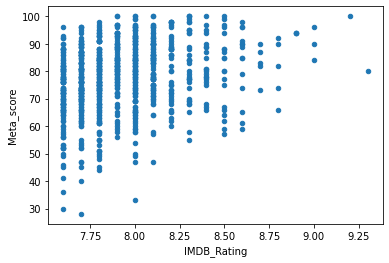

In [ ]:
#scatterplot

movies.plot(x='IMDB_Rating', y='Meta_score', kind='scatter')
plt.show()

In [ ]:
#start to look into missing data
print(movies.head(20))
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
#Eliminazione colonne inutili

movies = movies.drop('Poster_Link', axis=1)

# Prova 1

In [5]:
#check null data
print(movies.isnull().sum())


Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


# Data cleaning prova 1: Eliminazione colonna Gross, eliminazione righe Certificate, media Meta_score

In [6]:
movies = movies.dropna(axis=0, subset=['Certificate'])
print(movies.isnull().sum())

Series_Title       0
Released_Year      0
Certificate        0
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       112
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            114
dtype: int64


In [7]:
movies = movies.drop("Gross", axis=1)
print(movies.isnull().sum())

Series_Title       0
Released_Year      0
Certificate        0
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       112
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
dtype: int64


In [8]:
movies['Meta_score'] = movies['Meta_score'].fillna(movies['Meta_score'].mean())
print(movies.isnull().sum())

Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
dtype: int64


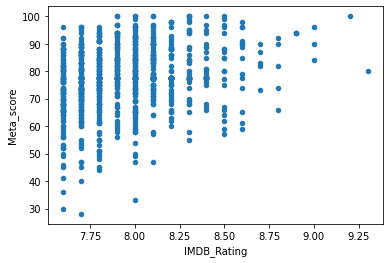

In [ ]:
#scatterplot prova 1

movies.plot(x='IMDB_Rating', y='Meta_score', kind='scatter')
plt.show()

In [14]:
movies = movies.assign(target = 0)
movies1 = movies
movies1 = movies.sample(frac = 0.4).assign(target = 1)
movies['target'] = movies1['target']
movies['target'] = movies['target'].fillna(0)


In [15]:
print(movies.head(100))

                 Series_Title Released_Year Certificate  Runtime  \
0    The Shawshank Redemption          1994           A  142 min   
1               The Godfather          1972           A  175 min   
2             The Dark Knight          2008          UA  152 min   
3      The Godfather: Part II          1974           A  202 min   
4                12 Angry Men          1957           U   96 min   
..                        ...           ...         ...      ...   
99          Good Will Hunting          1997           U  126 min   
100         Bacheha-Ye aseman          1997          PG   89 min   
101                 Toy Story          1995           U   81 min   
102                Braveheart          1995           A  178 min   
103            Reservoir Dogs          1992           R   99 min   

                            Genre  IMDB_Rating  \
0                           Drama          9.3   
1                    Crime, Drama          9.2   
2            Action, Crime, Drama